<a href="https://colab.research.google.com/github/grandff/kdn-machinelearning/blob/main/KDN_Mini_PJT_%EB%B6%84%EB%A5%98_%ED%95%B4%EC%84%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
일반적인 절차들임
1. 데이터 불러오기
	-> read_csv, read_excel 등
2. 데이터 전처리 !! 필수로 해야함
	-> 결측치 확인(NA)
	-> 데이터타입 확인(숫자형 등등)
3. 데이터 분할하기(필수는 아님)
	-> X
		-> train (학습)
		-> test (평가)
	-> Y
		-> train (학습)
		-> test (평가)
4. 데이터 학습하기
	-> sklearn, xgboost 등
	-> tensorflow, pytorch 등
```

In [ ]:
!wget http://49.247.133.7/creditcard.csv

--2021-10-05 07:32:01--  http://49.247.133.7/creditcard.csv
Connecting to 49.247.133.7:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150828752 (144M) [text/csv]
Saving to: ‘creditcard.csv’

creditcard.csv      100%[===================>] 143.84M  18.3MB/s    in 8.9s    

2021-10-05 07:32:10 (16.1 MB/s) - ‘creditcard.csv’ saved [150828752/150828752]



In [ ]:
import os
import glob
import shutil
import numpy as np    # 이미지 데이터 처리할때 많이 사용
import pandas as pd   # 정형 데이터는 pandas 무조건 이용
import matplotlib.pyplot as plt   # 시각화 라이브러리
import seaborn as sns             # 시각화 라이브러리

import warnings

warnings.filterwarnings(action='ignore') 

In [ ]:
# creditcard.csv을 읽어 df에 저장하세요
df = pd.read_csv('creditcard.csv')
## excel -> read_excel
df
## dataframe 속성 -> 변수 기능 -> 함수 처럼 사용

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
# 데이터 프레임의 shape을 조회하세요
## 284807 -> 행의 갯수 -> 데이터 갯수
## 31 -> 열의 갯수 -> 즉 특성의 갯수임
df.shape

(284807, 31)

In [ ]:
# 데이터 프레임의 결측치를 조회하세요
## isna를 사용해서 결측치 확인을 하는거임 == 사용 안함
## na true => 1 , na false => 0
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# 데이터 프레임의 정보를 출력하세요
## null 여부, 데이터 count, 데이터 타입(float, int) 확인 가능
## data type 길이에 제약이 있으면 float64 -> float32 로 바꾸기도 함
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# 데이터 프레임의 기초 통계 분석을 진행하세요.
## std, var -> 너무 낮음 -> 삭제 처리
## 0에 가까울때만
## 정상일떄 0이고, 비정상일때도 0이면 해당 데이터는 확인하기도 어렵고 필요도 없음
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# var() 함수를 이용하여 데이터 프레임의 컬럼별 분산값을 조회하세요
df.var()

Time      2.255124e+09
V1        3.836489e+00
V2        2.726820e+00
V3        2.299029e+00
V4        2.004684e+00
V5        1.905081e+00
V6        1.774946e+00
V7        1.530401e+00
V8        1.426479e+00
V9        1.206992e+00
V10       1.185594e+00
V11       1.041855e+00
V12       9.984034e-01
V13       9.905708e-01
V14       9.189055e-01
V15       8.378034e-01
V16       7.678191e-01
V17       7.213734e-01
V18       7.025394e-01
V19       6.626619e-01
V20       5.943254e-01
V21       5.395255e-01
V22       5.266428e-01
V23       3.899507e-01
V24       3.668084e-01
V25       2.717308e-01
V26       2.325429e-01
V27       1.629192e-01
V28       1.089550e-01
Amount    6.256007e+04
Class     1.724507e-03
dtype: float64

In [ ]:
# Class 컬럼의 값별 개수를 계산하세요.
## df['Class'] : Series (1개 컬럼)
## 행이 일치하는 갯수를 리턴해줌
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# Class 컬럼의 값별 비율을 계산하세요.
## normalize -> 정규화 적용
## 값별 비율이 상당히 불균형함
## 이런 경우에는 샘플링, 정밀도/재현율 사용, 층화추출 적용 등의 방법을 적용해야함
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

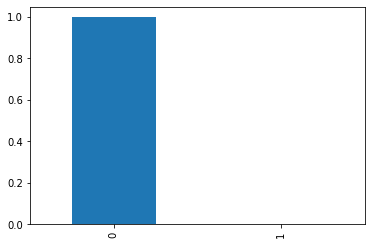

In [ ]:
# 해당 결과를 시각화하세요.
df['Class'].value_counts(normalize=True).plot(kind='bar')

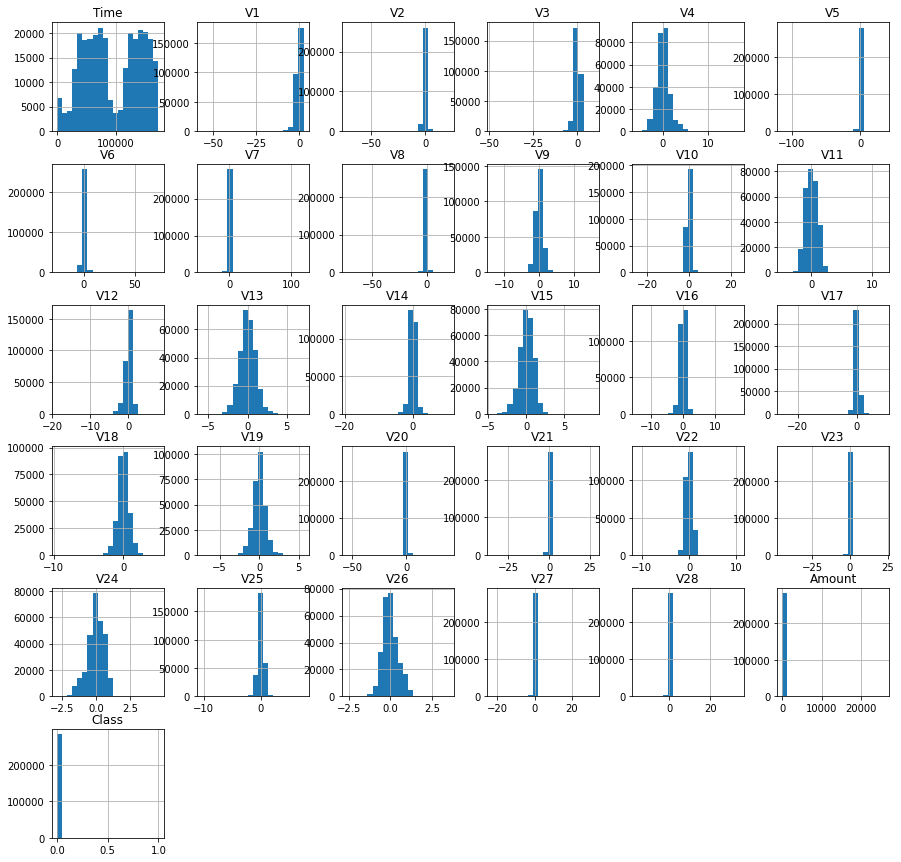

In [ ]:
# 데이터 프레임의 컬럼별 분포를 확인하세요
# hist(figsize=(15, 15), bins=20) 함수를 사용하세요.
## figsize -> 이미지 크기
## bins -> 구조
## 데이터 스케일이 너무 크면 log를 통해 조정해나가는 방법을 씀
df.hist(figsize=(15, 15), bins=20)
plt.show()

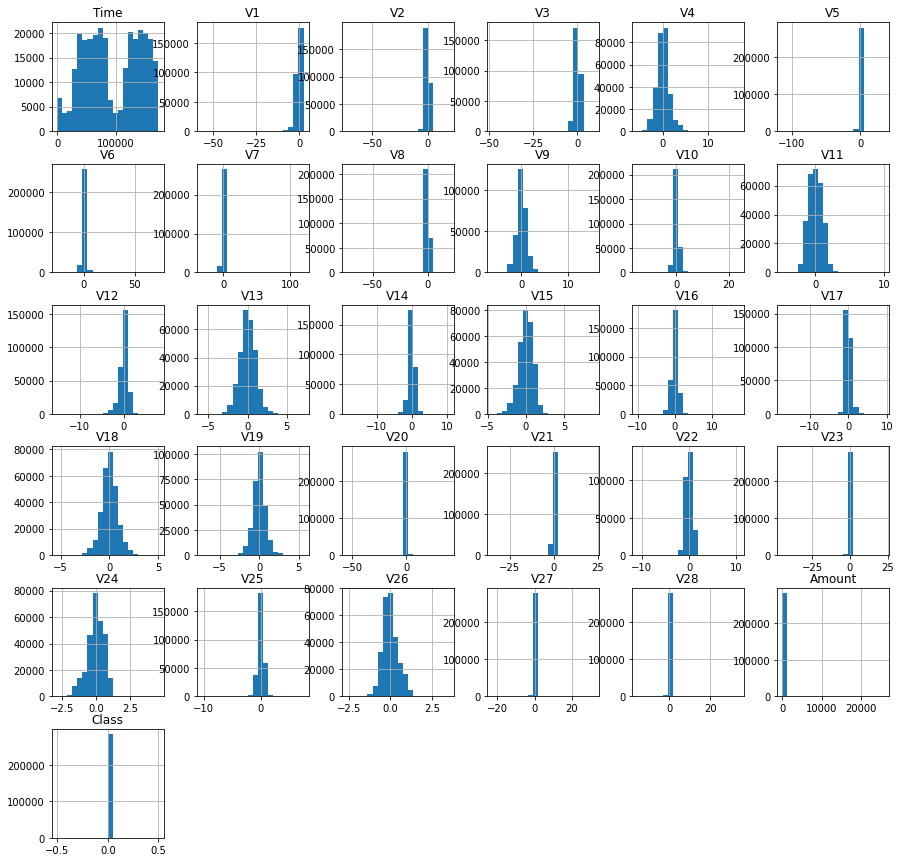

In [ ]:
# 정상 데이터(Class 0)만 추출 후 컬럼별 분포를 확인하세요
# hist(figsize=(15, 15), bins=20) 함수를 사용하세요.
df[df['Class'] == 0].hist(figsize=(15, 15), bins=20)
plt.show()

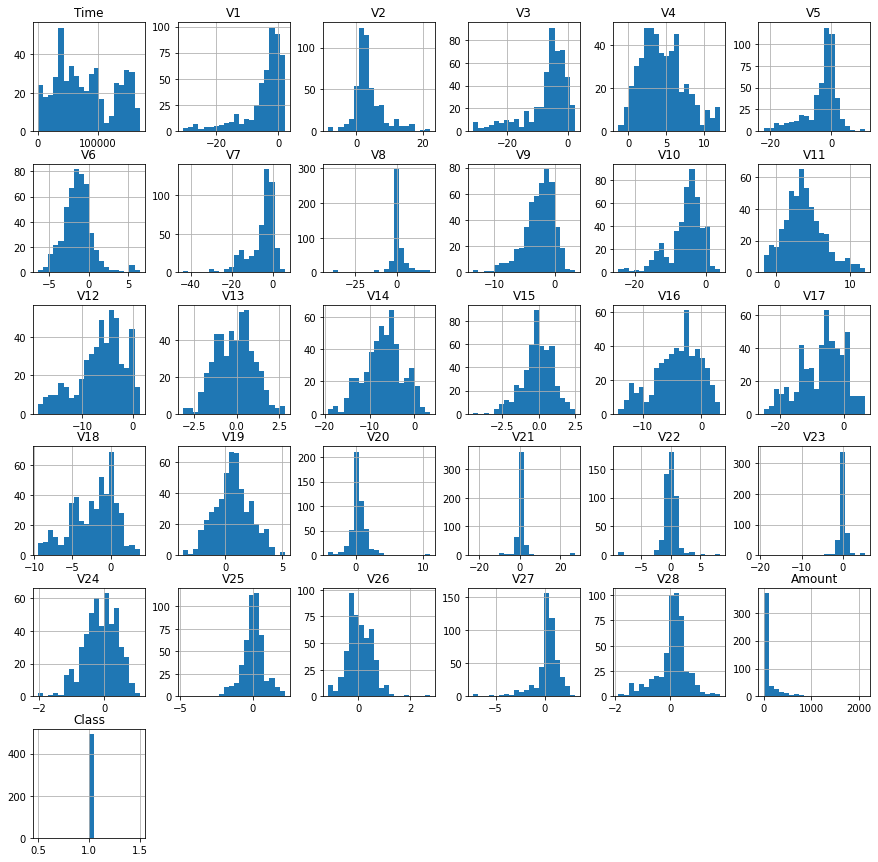

In [ ]:
# 비정상 데이터(Class 1)만 추출 후 컬럼별 분포를 확인하세요
# hist(figsize=(15, 15), bins=20) 함수를 사용하세요.
df[df['Class'] == 1].hist(figsize=(15, 15), bins=20)
plt.show()

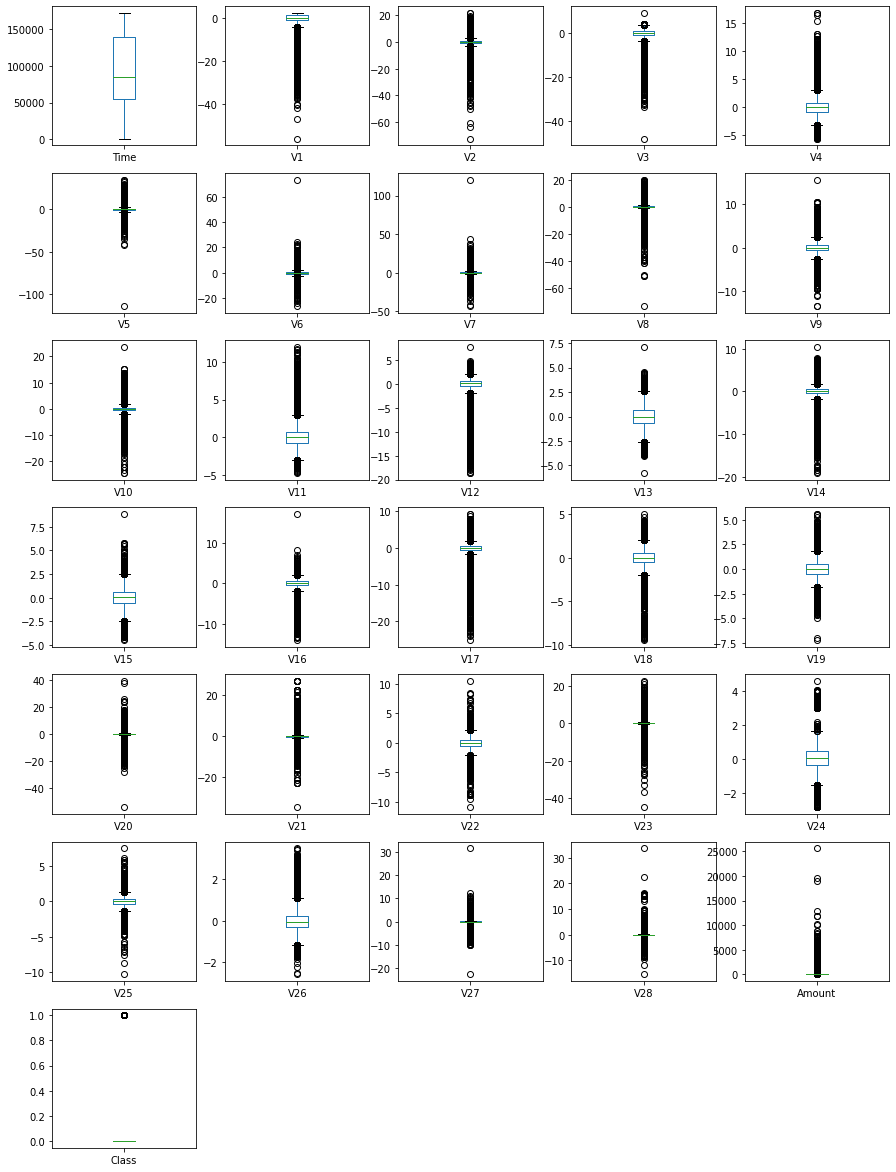

In [ ]:
# 각 컬럼별 BoxPlot을 그려보세요
# subplots=True, layout=(7, 5), figsize=(15,21) 사용
## subplots -> 각 컬럼별 그래프 유무
## layout -> 행과열 배치
## 보통 subplots와 layout 두개를 같이 씀
## figsize 가로, 세로 크기. 단위는 inch.
df.plot(kind='box', subplots=True, layout=(7, 5), figsize=(15, 21))
plt.show()

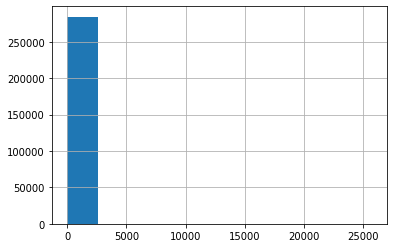

In [ ]:
# Amount 컬럼의 분포를 시각화하세요
# hist 함수 이용
df['Amount'].hist()

In [ ]:
# np.log1p 함수를 이용하여 Amount_log 컬럼을 생성하세요
## 현재 amount 분포가 불균등하니 log로 다져주는 역할을 해줌
## log1p를 많이 사용함
df['Amount_log'] = np.log1p(df['Amount'])
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.014760
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.305626
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.939276
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.824306
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.262539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,0.570980
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,3.249987
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,4.232366
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,2.397895


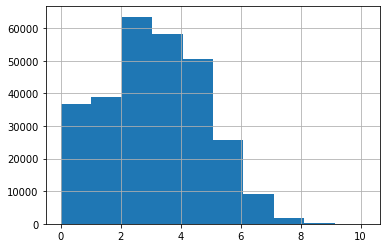

In [ ]:
# Amount_log 컬럼의 분포를 시각화하세요
# hist 함수 이용
df['Amount_log'].hist()

Text(0.5, 1.0, 'Normal')

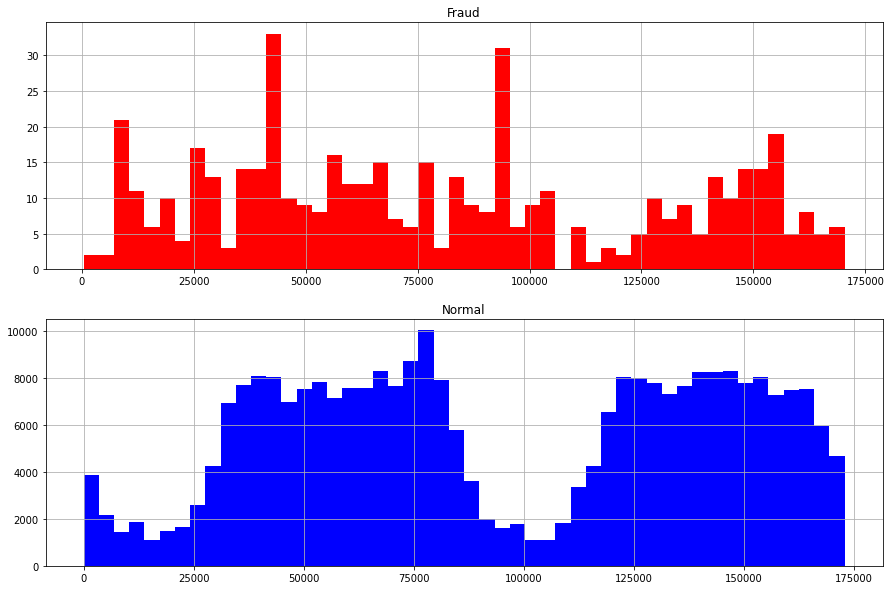

In [ ]:
# class 컬럼의 값인 1인 데이터 프레임을 추출 후 Time 컬럼을 hist 함수를 이용하여 시각화 하세요.
# subplot을 이용하세요.
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
df.loc[df['Class'] == 1, 'Time'].hist(bins=50, color='r')
plt.title('Fraud')
plt.subplot(2, 1, 2)
df.loc[df['Class'] == 0, 'Time'].hist(bins=50, color='b')
plt.title('Normal')

Text(0.5, 1.0, 'Fraud')

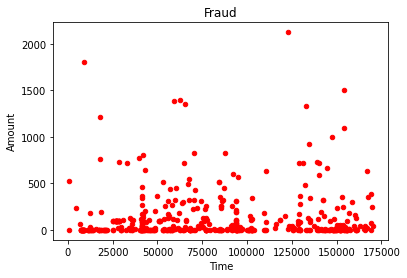

In [ ]:
# class 컬럼의 값인 1인 데이터 프레임을 추출 후 Time 컬럼을 scatter 함수를 이용하여 시각화 하세요.
df.loc[df['Class'] == 1].plot(kind='scatter', x='Time', y='Amount', color='r')
plt.title('Fraud')

Text(0.5, 1.0, 'Normal')

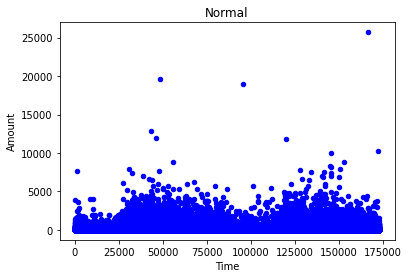

In [ ]:
# class 컬럼의 값인 0인 데이터 프레임을 추출 후 Time 컬럼을 scatter 함수를 이용하여 시각화 하세요.
df.loc[df['Class'] == 0].plot(kind='scatter', x='Time', y='Amount', color='b')
plt.title('Normal')

In [ ]:
# 데이터 프레임의 상관관계를 계산하세요
## 선형회귀에 많이 쓰임
## 피어슨 상관관계.. 머이리 어려워
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_log
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323,-0.028515
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347,-0.096375
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289,-0.450317
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961,-0.033913
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447,-0.004677
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-3.517076e-16,1.425729e-16,1.109525e-15,-3.138234e-16,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974,-0.286189
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-2.477917e-16,3.567582e-16,2.811474e-16,2.717167e-16,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643,0.163822
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,2.893672e-16,1.149692e-15,-1.116789e-16,-2.874017e-16,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257,0.095758
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875,-0.020690
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933

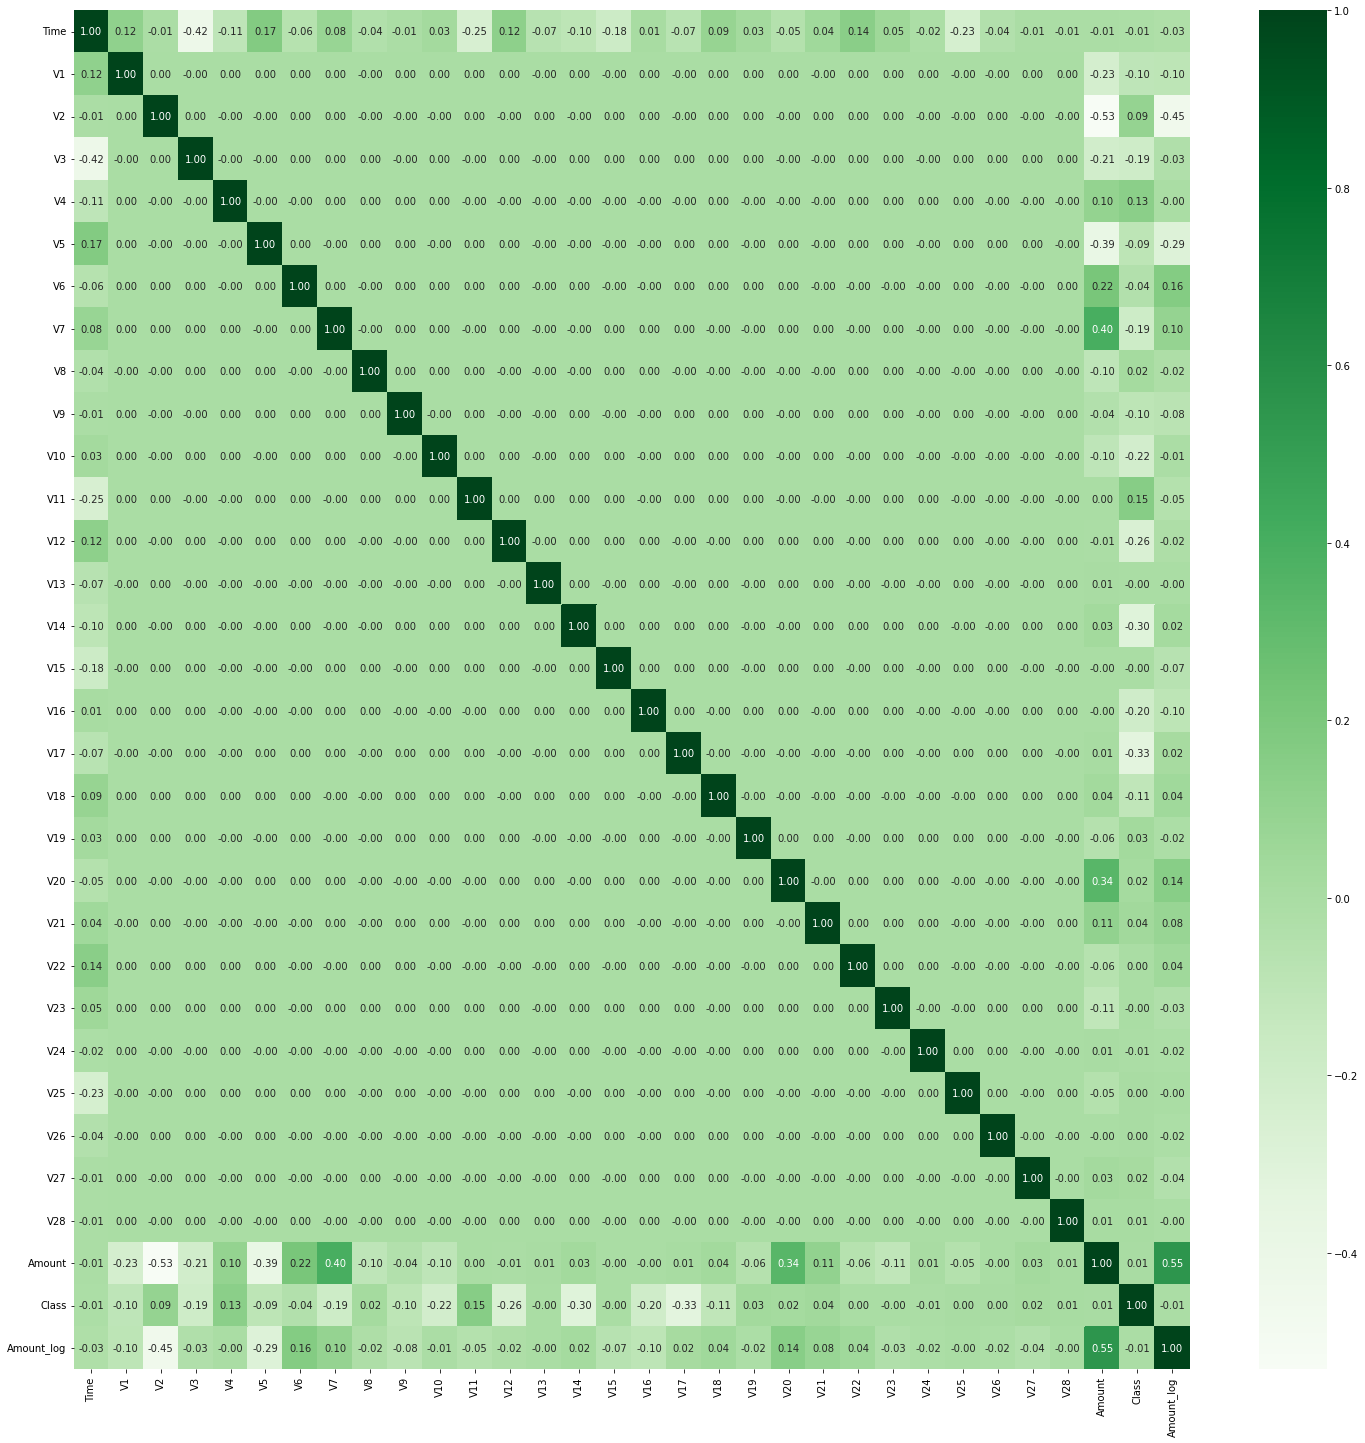

In [ ]:
# 계산된 상관 관계를 heatmap을 이용하여 시각화 하세요
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), fmt='.2f', annot=True, cmap='Greens')

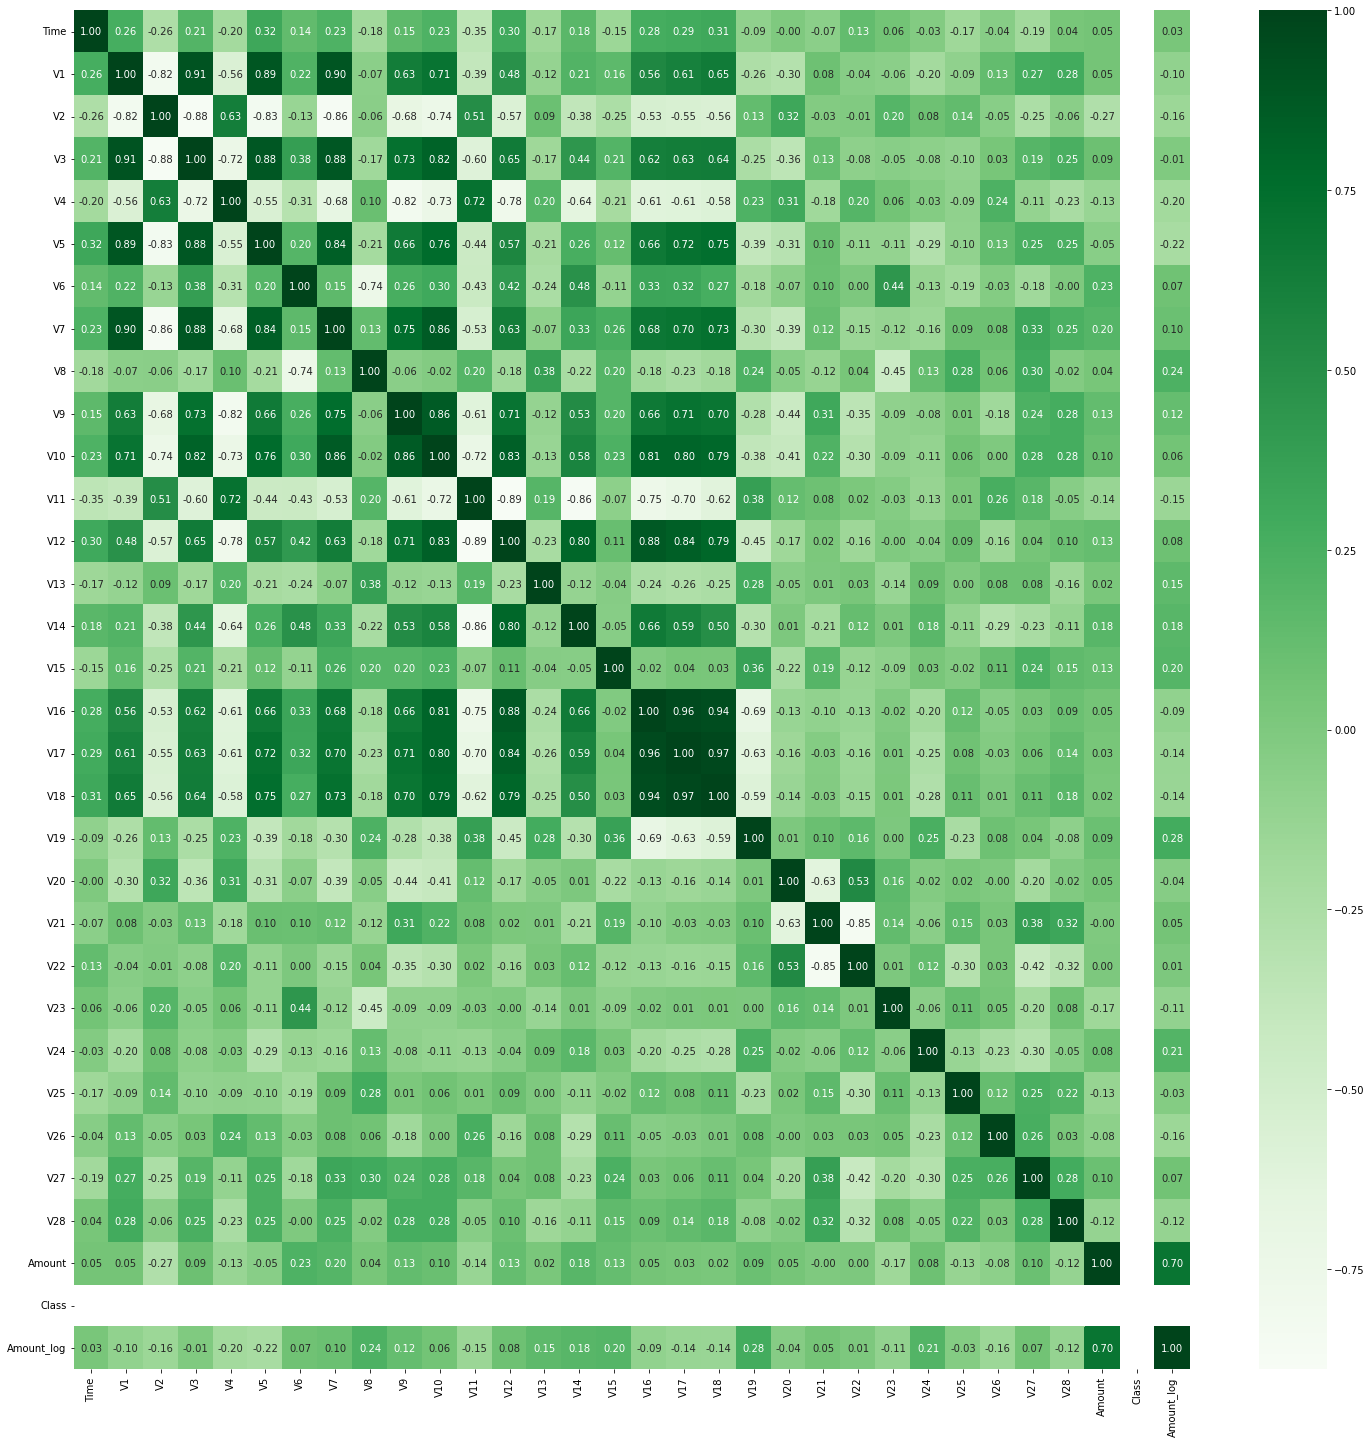

In [ ]:
# class 컬럼의 값인 1인 데이터 프레임을 추출 후 상관 관계를 heatmap을 이용하여 시각화 하세요
plt.figure(figsize=(25, 25))
sns.heatmap(df[df['Class']==1].corr(), fmt='.2f', annot=True, cmap='Greens')

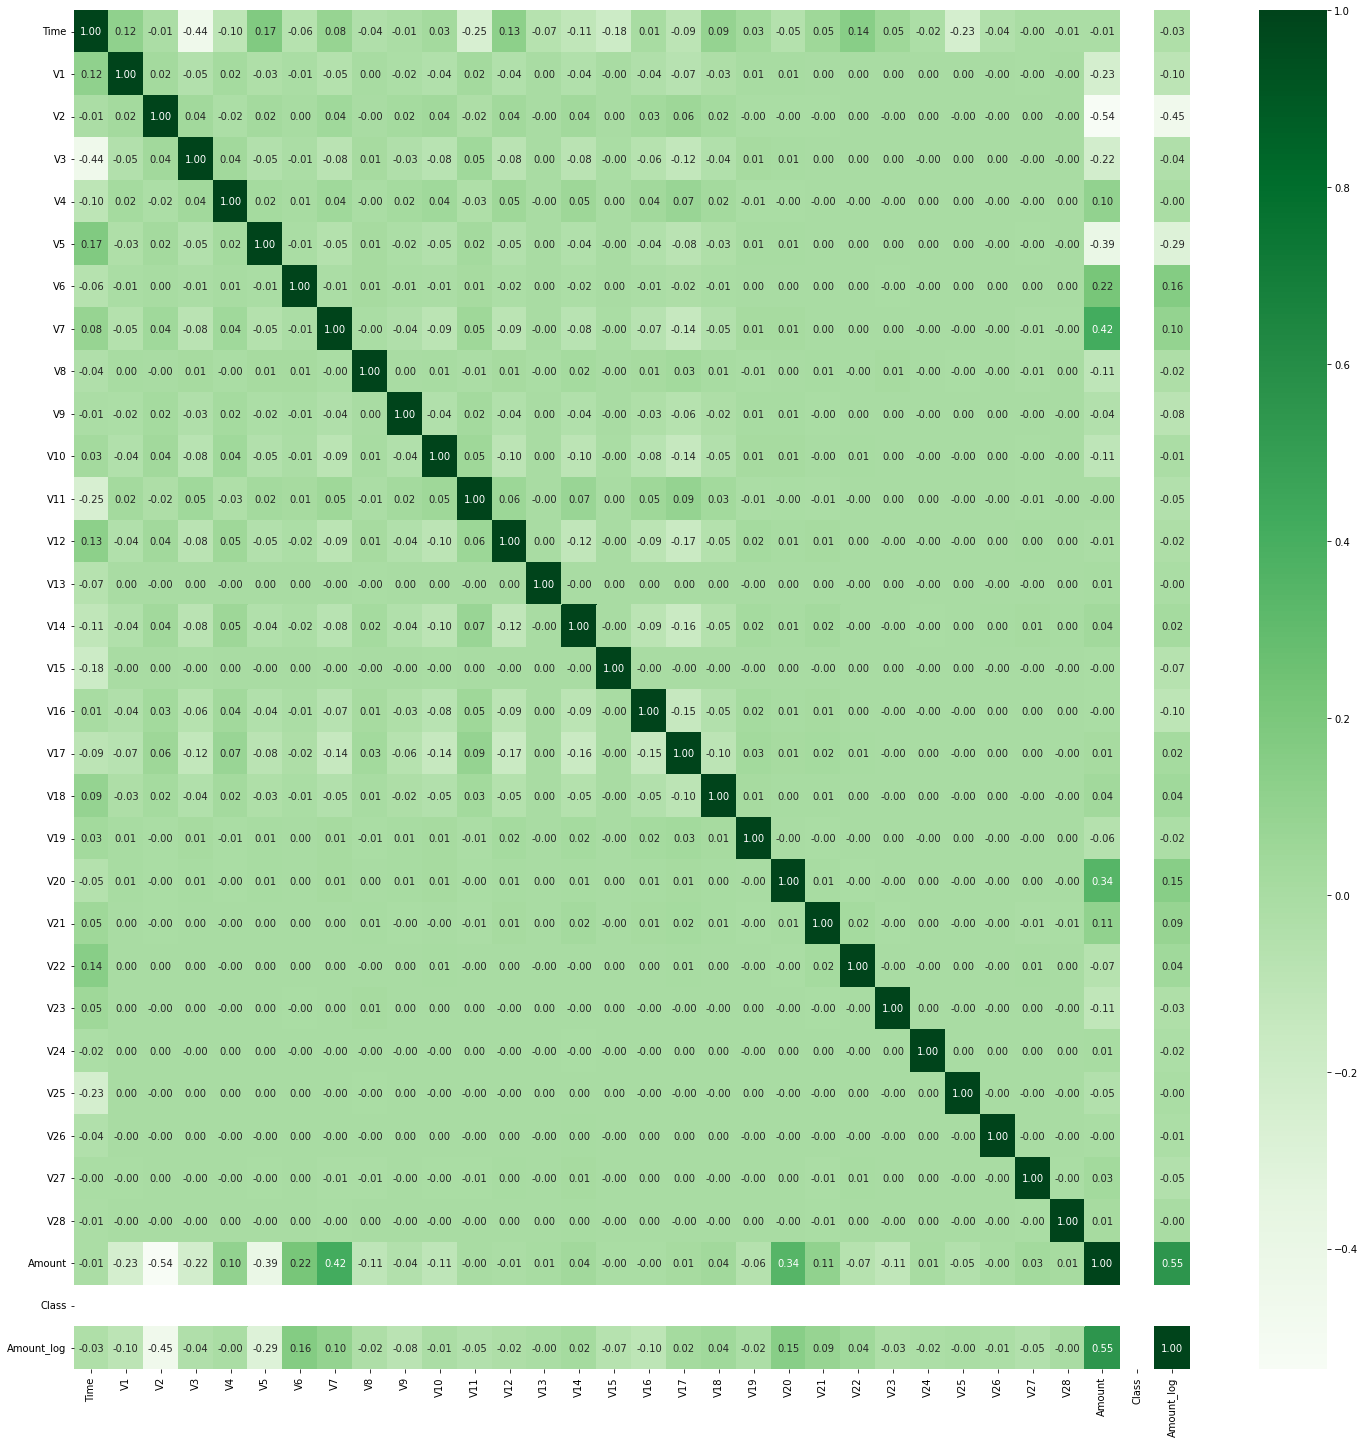

In [ ]:
# class 컬럼의 값인 0인 데이터 프레임을 추출 후 상관 관계를 heatmap을 이용하여 시각화 하세요
plt.figure(figsize=(25, 25))
sns.heatmap(df[df['Class']==0].corr(), fmt='.2f', annot=True, cmap='Greens')

In [ ]:
# 학습에 사용할 특성을 선택하세요. (학습에서 제외하기 위해선 주석처리 합니다.)
## 컬럼을 따로 저장해놓고 여기서 수정하는걸로 하는게 좋다고 함
features = [
     'V1',
     'V2',
     'V3',
     'V4',
     'V5',
     'V6',
     'V7',
     'V8',
     'V9',
     'V10',
     'V11',
     'V12',
     'V13',
     'V14',
     'V15',
     'V16',
     'V17',
     'V18',
     'V19',
     'V20',
     'V21',
     'V22',
     'V23',
     'V24',
     'V25',
     'V26',
     'V27',
     'V28',
     'Amount_log'
]
features

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount_log']

In [ ]:
# features에 저장된 컬럼명만 추출하여 X에 대입하세요.
X = df[features]
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_log
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.570980
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,3.249987
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,4.232366
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,2.397895


In [ ]:
# Class 컬럼을 추출하여 Y에 대입하세요
Y = df['Class']
Y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report

In [ ]:
# 추출된 X데이터를 RobustSclaer를 이용하여 정규화하세요.
## IQR, median을 사용함. 이상치 영향이 적음.
scaler = RobustScaler()
X_Sclaed = scaler.fit_transform(X)
X_Sclaed

array([[-0.61623732, -0.09860181,  1.22890545, ...,  0.81673112,
        -0.24609073,  0.76029701],
       [ 0.52492862,  0.14309984, -0.00697044, ..., -0.0637815 ,
         0.02651893, -0.74031194],
       [-0.61558747, -1.0024067 ,  0.83093237, ..., -0.35021814,
        -0.54096166,  1.13432963],
       ...,
       [ 0.85037719, -0.26153195, -1.78846319, ...,  0.01922743,
        -0.28805801,  0.44376276],
       [-0.1156293 ,  0.33160212,  0.27256711, ...,  0.66392082,
         0.71082878, -0.29841135],
       [-0.24665367, -0.18200361,  0.27299846, ..., -0.02321069,
         0.01832587,  0.90988115]])

In [ ]:
# X_Sclaed와 Y를 이용하여 데이터를 분할하세요. 
# 층화추출을 적용하세요, random_state는 0으로 지정하세요.
## stratify=Y 를 주면 분류를 사용. 층화추출을 사용하는것과 같음?
x_train, x_test, y_train, y_test = train_test_split(X_Sclaed, Y, stratify=Y, random_state=0)

In [ ]:
# KNN 모델을 적용 후 성능을 평가하세요. 
## 이것 시간이 좀 오래 걸림
## n_jobs=-1 을 모든 리소스를 할당
model = KNeighborsClassifier(n_jobs=-1).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9995692984714777, 0.9994241734782731)

In [ ]:
# 범주의 비율이 비대칭인 경우 정확도는 높게 나올 수 있습니다. 
# 정확한 성능 평가를 위해 classification_report 함수를 이용해서 test 데이터를 평가하세요.
## 이건 시간이 올래걸림
## recall 재현율. 즉 실제 데이터를 얼마나 잘 예측하고 있는지임.
p_test = model.predict(x_test)
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.94      0.72      0.81       123

    accuracy                           1.00     71202
   macro avg       0.97      0.86      0.91     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
# LogisticRegreesion 모델을 적용 후 성능을 평가하세요. 
model = LogisticRegression().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9992696800168536, 0.9991994606893064)

In [ ]:
# 범주의 비율이 비대칭인 경우 정확도는 높게 나올 수 있습니다. 
# 정확한 성능 평가를 위해 classification_report 함수를 이용해서 test 데이터를 평가하세요.
p_test = model.predict(x_test)
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.86      0.64      0.73       123

    accuracy                           1.00     71202
   macro avg       0.93      0.82      0.87     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
# DecisionTree 모델을 적용 후 성능을 평가하세요. 
model = DecisionTreeClassifier().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.9992135052386169)

In [ ]:
# 범주의 비율이 비대칭인 경우 정확도는 높게 나올 수 있습니다. 
# 정확한 성능 평가를 위해 classification_report 함수를 이용해서 test 데이터를 평가하세요.
p_test = model.predict(x_test)
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.78      0.76      0.77       123

    accuracy                           1.00     71202
   macro avg       0.89      0.88      0.89     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
# RandomFores 모델을 적용 후 성능을 평가하세요. 
model = RandomForestClassifier().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.9994803516755147)

In [ ]:
# 범주의 비율이 비대칭인 경우 정확도는 높게 나올 수 있습니다. 
# 정확한 성능 평가를 위해 classification_report 함수를 이용해서 test 데이터를 평가하세요.
p_test = model.predict(x_test)
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.96      0.73      0.83       123

    accuracy                           1.00     71202
   macro avg       0.98      0.87      0.91     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
# GradientBoosting 모델을 적용 후 성능을 평가하세요. 
model = GradientBoostingClassifier().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9990402846375319, 0.9989747479003399)

In [ ]:
# 범주의 비율이 비대칭인 경우 정확도는 높게 나올 수 있습니다. 
# 정확한 성능 평가를 위해 classification_report 함수를 이용해서 test 데이터를 평가하세요.
p_test = model.predict(x_test)
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.81      0.53      0.64       123

    accuracy                           1.00     71202
   macro avg       0.91      0.76      0.82     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
# xgboost 모델을 적용 후 성능을 평가하세요. 
model = XGBClassifier().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

[02:09:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(1.0, 0.9995646189713772)

In [ ]:
# 범주의 비율이 비대칭인 경우 정확도는 높게 나올 수 있습니다. 
# 정확한 성능 평가를 위해 classification_report 함수를 이용해서 test 데이터를 평가하세요.
p_test = model.predict(x_test)
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.96      0.78      0.86       123

    accuracy                           1.00     71202
   macro avg       0.98      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
# lightgbm 모델을 적용 후 성능을 평가하세요. 
model = LGBMClassifier().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9972051216029587, 0.9967276200106738)

In [ ]:
# 범주의 비율이 비대칭인 경우 정확도는 높게 나올 수 있습니다. 
# 정확한 성능 평가를 위해 classification_report 함수를 이용해서 test 데이터를 평가하세요.
## 튜닝을 하지 않고 해서 성능이 나쁨
p_test = model.predict(x_test)
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.25      0.45      0.32       123

    accuracy                           1.00     71202
   macro avg       0.62      0.72      0.66     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# DNN 모델을 생성 후 학습하세요. (모델은 자유롭게 구성하세요)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=x_train.shape[1:]))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/100
3338/3338 [==============================] - 2s 630us/step - loss: 0.0070 - acc: 0.9990 - val_loss: 0.0035 - val_acc: 0.9993
Epoch 2/100
3338/3338 [==============================] - 2s 606us/step - loss: 0.0034 - acc: 0.9994 - val_loss: 0.0034 - val_acc: 0.9993
Epoch 3/100
3338/3338 [==============================] - 2s 604us/step - loss: 0.0029 - acc: 0.9994 - val_loss: 0.0035 - val_acc: 0.9993
Epoch 4/100
3338/3338 [==============================] - 2s 606us/step - loss: 0.0027 - acc: 0.9994 - val_loss: 0.0031 - val_acc: 0.9994
Epoch 5/100
3338/3338 [==============================] - 2s 612us/step - loss: 0.0024 - acc: 0.9995 - val_loss: 0.0038 - val_acc: 0.9993
Epoch 6/100
3338/3338 [==============================] - 2s 625us/step - loss: 0.0026 - acc: 0.9995 - val_loss: 0.0038 - val_acc: 0.9994
Epoch 7/100
3338/3338 [==============================] - 2s 618us/step - loss: 0.0023 - acc: 0.9995 - val_loss: 0.0041 - val_acc: 0.9995
Epoch 8/100
3338/3338 [==================

3338/3338 [==============================] - 2s 601us/step - loss: 5.9993e-04 - acc: 0.9999 - val_loss: 0.0261 - val_acc: 0.9994
Epoch 60/100
3338/3338 [==============================] - 2s 600us/step - loss: 5.2601e-04 - acc: 0.9998 - val_loss: 0.0267 - val_acc: 0.9994
Epoch 61/100
3338/3338 [==============================] - 2s 600us/step - loss: 9.1482e-04 - acc: 0.9998 - val_loss: 0.0201 - val_acc: 0.9992
Epoch 62/100
3338/3338 [==============================] - 2s 598us/step - loss: 4.6774e-04 - acc: 0.9998 - val_loss: 0.0225 - val_acc: 0.9994
Epoch 63/100
3338/3338 [==============================] - 2s 607us/step - loss: 6.1081e-04 - acc: 0.9998 - val_loss: 0.0313 - val_acc: 0.9994
Epoch 64/100
3338/3338 [==============================] - 2s 606us/step - loss: 7.1386e-04 - acc: 0.9998 - val_loss: 0.0382 - val_acc: 0.9995
Epoch 65/100
3338/3338 [==============================] - 2s 607us/step - loss: 4.5078e-04 - acc: 0.9999 - val_loss: 0.0421 - val_acc: 0.9994
Epoch 66/100
3338/3

In [ ]:
# evaluate 함수를 이용하여 test 데이터의 성능을 측정하세요
model.evaluate(x_test, y_test)

2226/2226 [==============================] - 1s 296us/step - loss: 0.0271 - acc: 0.9993


[0.027104420587420464, 0.9993398785591125]

In [ ]:
# 범주의 비율이 비대칭인 경우 정확도는 높게 나올 수 있습니다. 
# 정확한 성능 평가를 위해 classification_report 함수를 이용해서 test 데이터를 평가하세요.
p_test = model.predict(x_test)
p_test = np.where(p_test>=0.5, 1, 0)
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.91      0.68      0.78       123

    accuracy                           1.00     71202
   macro avg       0.96      0.84      0.89     71202
weighted avg       1.00      1.00      1.00     71202



# 데이터 전처리, 모델 튜닝을 통해 모델의 성능을 최대화 해보세요.